In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the dataset
file_path = 'data/bsmax_0_1.csv'
data = pd.read_csv(file_path, sep='\t')

# Split the data into 80% for training and 20% for prediction
split_index = int(len(data) * 0.8)
train_data = data[:split_index]
predict_data = data[split_index:]

# Separate features and target variable for training data
X_train = train_data.drop('rtn', axis=1)
y_train = train_data['rtn']

# Normalize the features for training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Separate features and target variable for prediction data
X_predict = predict_data.drop('rtn', axis=1)
y_actual = predict_data['rtn']

# Normalize the features for prediction data
X_predict_scaled = scaler.transform(X_predict)

# Predict on the prediction set
y_pred = model.predict(X_predict_scaled)

# Evaluate the model on the prediction set
r2 = r2_score(y_actual, y_pred)
print(f'R-squared value on prediction data: {r2}')


R-squared value on prediction data: 0.7999694122666615


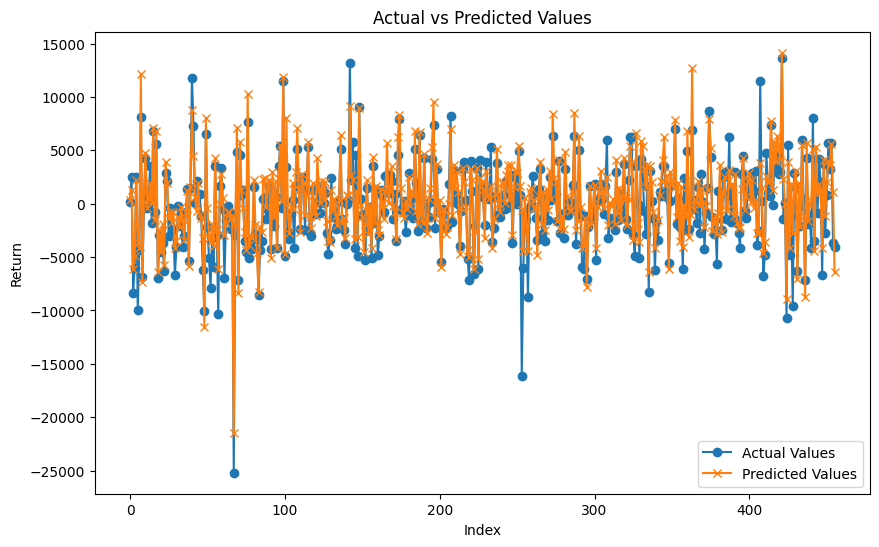

In [3]:
# Visual comparison
plt.figure(figsize=(10, 6))
plt.plot(y_actual.values, label='Actual Values', marker='o')
plt.plot(y_pred, label='Predicted Values', marker='x')
plt.title('Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Return')
plt.legend()
plt.show()

             ymd      init       rtn       avg       dev     bkmax     skmax  \
ymd     1.000000  0.646033 -0.005160  0.648250  0.241207  0.037445  0.087367   
init    0.646033  1.000000 -0.080744  0.998217  0.432753  0.033850  0.092721   
rtn    -0.005160 -0.080744  1.000000 -0.027554 -0.078949  0.074822  0.064746   
avg     0.648250  0.998217 -0.027554  1.000000  0.429173  0.039641  0.097299   
dev     0.241207  0.432753 -0.078949  0.429173  1.000000 -0.137719 -0.105051   
bkmax   0.037445  0.033850  0.074822  0.039641 -0.137719  1.000000  0.549990   
skmax   0.087367  0.092721  0.064746  0.097299 -0.105051  0.549990  1.000000   
bomega -0.017368  0.001425 -0.105082 -0.006483 -0.128167  0.155649  0.132506   
somega  0.020111 -0.008907 -0.042518 -0.012112  0.053817 -0.150256 -0.137532   
bpri    0.062317  0.090028 -0.194340  0.077677  0.047738 -0.110650 -0.013820   
bfor   -0.012459  0.028553 -0.021869  0.026089  0.236441 -0.513758 -0.417208   
bmom   -0.014812  0.000763  0.131579  0.

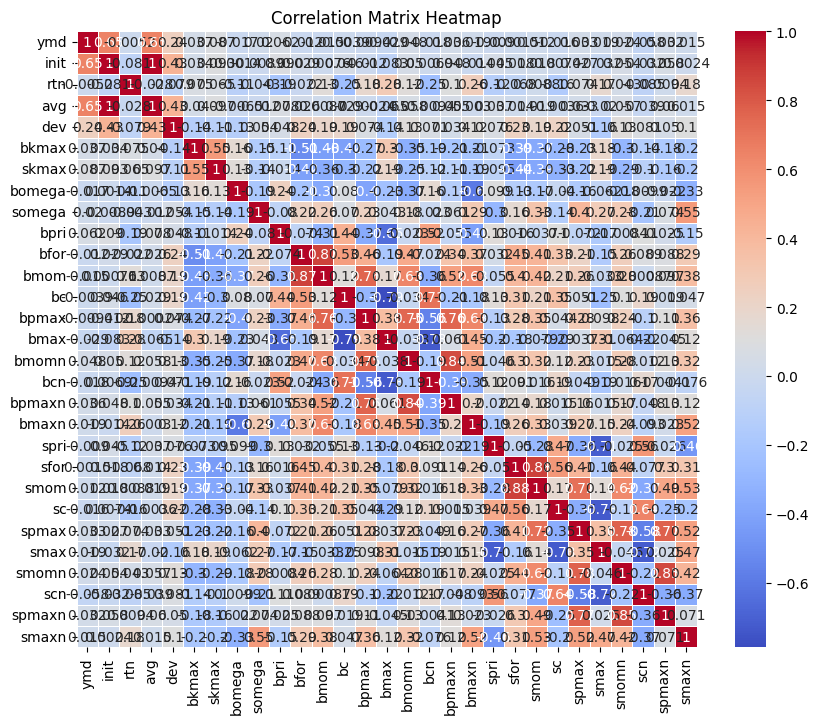

In [11]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Print the correlation matrix
print(correlation_matrix)

# Plot the correlation matrix as a heatmapx
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()